### Content:
This meticulously cleaned dataset presents a comprehensive collection of 991 unique laptops sourced from the 'Smartprix' website. Enriched with 22 features including laptop name, price in Indian rupees, processor, GPU, and more, it provides valuable insights for building robust price prediction models and effective recommendation systems. Updated as of January 14, 2024, this dataset is a reliable foundation for exploring the intricate landscape of laptop pricing dynamics and consumer preferences.

### About the laptops.csv file:
- Brand : The name of the laptop brand.
- Model : The specific model or series of the laptop.
- Price : The price of the laptop in Indian rupees.
- Rating : The rating assigned to each laptop based on its specifications.
- Processor brand : The brand of the processor used in the laptop.
- Processor tier : The performance tier or category of the processor.
- Number of Cores : The number of processing cores in the processor.
- Number of Threads : The number of threads supported by the processor.
- Ram memory : The amount of RAM used in the laptop.
- Primary storage type : The type of primary storage (e.g., HDD, SSD).
- Primary storage capacity : The capacity of the primary storage in the laptop.
- Secondary storage type : The type of secondary storage, if available.
- Secondary storage capacity : The capacity of the secondary storage in the laptop.
- GPU brand : The brand of the graphics processing unit (GPU).
- GPU type : The type of the GPU.
- Is Touch screen : Indicates whether the laptop has a touch screen feature.
- Display size : The size of the laptop display in inches.
- Resolution width : The width resolution of the display.
- Resolution height : The height resolution of the display.
- OS : The operating system installed on the laptop.
- Year of warranty : The duration of the warranty provided for the laptop, usually in years

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE

df=pd.read_csv('../../data/modelers_data.csv')
#df=df.drop("index",axis=1)
df.head()

,index,brand,Model,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,...,secondary_storage_type,secondary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty
0,949,msi,MSI Modern 15 B7M-072IN Laptop (Ryzen 5 7530U/...,43990,53,amd,ryzen 5,6,12,8,...,No secondary storage,0,amd,integrated,False,15.6,1920,1080,windows,1
1,584,msi,MSI Prestige 16 A13UCX-250IN Laptop (13th Gen ...,119990,73,intel,core i7,14,20,16,...,No secondary storage,0,nvidia,dedicated,False,16.0,2560,1600,windows,2
2,937,acer,Acer Aspire 7 A715-75G Gaming Laptop (10th Gen...,45990,59,intel,core i5,4,8,8,...,No secondary storage,0,nvidia,dedicated,False,15.6,1920,1080,windows,1
3,416,msi,MSI CreatorPro Z16 HX B13VKTO-214IN Laptop (13...,449990,89,intel,core i9,24,32,4,...,No secondary storage,0,nvidia,dedicated,False,16.0,2560,1600,windows,2
4,538,acer,Acer Aspire 3 Spin 14 NX.KENSI.002 Laptop (Int...,41490,45,intel,core i3,8,8,8,...,No secondary storage,0,intel,integrated,False,14.0,1920,1200,windows,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693 entries, 0 to 692
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       693 non-null    int64  
 1   brand                       693 non-null    object 
 2   Model                       693 non-null    object 
 3   Price                       693 non-null    int64  
 4   Rating                      693 non-null    int64  
 5   processor_brand             693 non-null    object 
 6   processor_tier              693 non-null    object 
 7   num_cores                   693 non-null    int64  
 8   num_threads                 693 non-null    int64  
 9   ram_memory                  693 non-null    int64  
 10  primary_storage_type        693 non-null    object 
 11  primary_storage_capacity    693 non-null    int64  
 12  secondary_storage_type      693 non-null    object 
 13  secondary_storage_capacity  693 non

In [3]:
df.describe()

,index,Price,Rating,num_cores,num_threads,ram_memory,primary_storage_capacity,secondary_storage_capacity,display_size,resolution_width,resolution_height
count,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000
mean,504.239538,77130.184704,64.191919,8.064935,12.178932,12.923521,608.369408,3.878788,15.201876,1994.409812,1172.072150
std,287.619742,57879.759959,9.778580,4.104854,5.417246,5.252160,266.134396,33.838912,0.927695,346.187751,250.576977
min,1.000000,12990.000000,31.000000,2.000000,0.000000,4.000000,32.000000,0.000000,10.100000,1080.000000,768.000000
25%,252.000000,43735.000000,58.000000,6.000000,8.000000,8.000000,512.000000,0.000000,14.000000,1920.000000,1080.000000
50%,505.000000,61990.000000,64.000000,8.000000,12.000000,16.000000,512.000000,0.000000,15.600000,1920.000000,1080.000000
75%,751.000000,88190.000000,71.000000,10.000000,16.000000,16.000000,512.000000,0.000000,15.600000,1920.000000,1200.000000
max,1002.000000,454490.000000,89.000000,24.000000,32.000000,36.000000,2048.000000,512.000000,18.000000,3456.000000,2234.000000


In [4]:
# check for duplicates
df.duplicated().sum()

0

In [5]:
# tell me size of the data
df.shape

(693, 22)

In [6]:
# check for null values
df.isnull().sum().to_frame().T

,index,brand,Model,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,...,secondary_storage_type,secondary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# for each column count unique values
# transpose this result
df.nunique().to_frame().T

,index,brand,Model,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,...,secondary_storage_type,secondary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty
0,693,23,693,422,51,4,14,12,15,6,...,2,4,5,3,2,18,16,18,5,4


In [8]:
# print unique values of os column
df['OS'].unique()

array(['windows', 'dos', 'mac', 'chrome', 'other'], dtype=object)

In [9]:
#remove index column
df.drop('index', axis=1, inplace=True)
df.head()

,brand,Model,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,primary_storage_type,...,secondary_storage_type,secondary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty
0,msi,MSI Modern 15 B7M-072IN Laptop (Ryzen 5 7530U/...,43990,53,amd,ryzen 5,6,12,8,SSD,...,No secondary storage,0,amd,integrated,False,15.6,1920,1080,windows,1
1,msi,MSI Prestige 16 A13UCX-250IN Laptop (13th Gen ...,119990,73,intel,core i7,14,20,16,SSD,...,No secondary storage,0,nvidia,dedicated,False,16.0,2560,1600,windows,2
2,acer,Acer Aspire 7 A715-75G Gaming Laptop (10th Gen...,45990,59,intel,core i5,4,8,8,SSD,...,No secondary storage,0,nvidia,dedicated,False,15.6,1920,1080,windows,1
3,msi,MSI CreatorPro Z16 HX B13VKTO-214IN Laptop (13...,449990,89,intel,core i9,24,32,4,SSD,...,No secondary storage,0,nvidia,dedicated,False,16.0,2560,1600,windows,2
4,acer,Acer Aspire 3 Spin 14 NX.KENSI.002 Laptop (Int...,41490,45,intel,core i3,8,8,8,SSD,...,No secondary storage,0,intel,integrated,False,14.0,1920,1200,windows,1


In [10]:
numerical_columns=df.select_dtypes(include=['int64','float64', 'bool']).columns
discrete_columns=[column for column in numerical_columns if df[column].nunique()<25]
continuous_columns=[column for column in numerical_columns if column not in discrete_columns]
category_columns=df.select_dtypes(include=['object']).columns

print(f"Discrete columns: {len(discrete_columns)}")
print(f"Continuous columns: {len(continuous_columns)}")
print(f"Category columns: {len(category_columns)}")


Discrete columns: 9
Continuous columns: 2
Category columns: 10


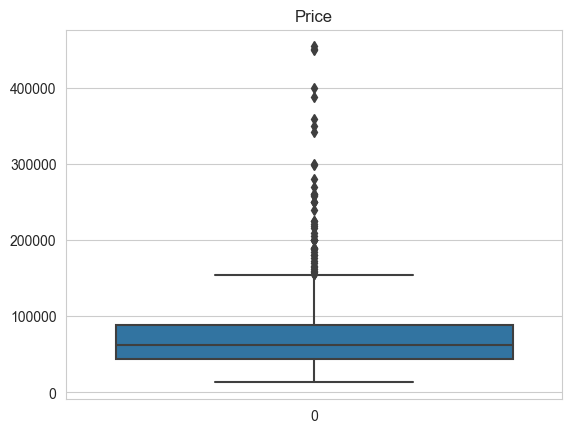

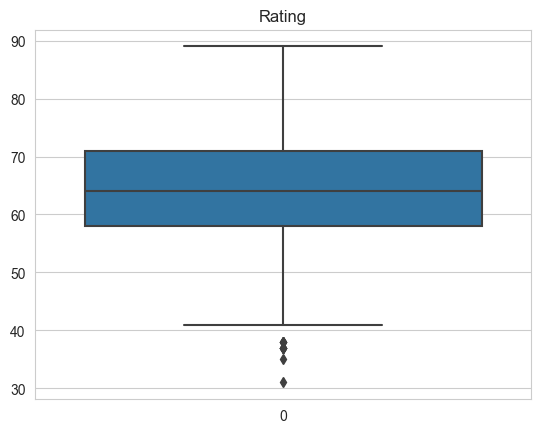

In [11]:
#quick check for outliers
for column in continuous_columns:
    sns.boxplot(df[column])
    plt.title(column)
    plt.show()

In [12]:
#   Column                      Non-Null Count  Dtype       Nulls                  Kodowanie                                   Blady
# ---  ------                      --------------  -----    -------                -------                                     ------
#  1   brand                       693 non-null    object                           grupowanie,
#  2   Model                       693 non-null    object                           odrzucic                                   
#  3   Price                       693 non-null    int64   
#  4   Rating                      693 non-null    int64  
#  5   processor_brand             693 non-null    object   other                   oh
#  6   processor_tier              693 non-null    object   other                   numerycznie
#  7   num_cores                   693 non-null    int64  
#  8   num_threads                 693 non-null    int64                                                                       2 równe 0 ?
#  9   ram_memory                  693 non-null    int64    
#  10  primary_storage_type        693 non-null    object                           oh,bin ?             676/17
#  11  primary_storage_capacity    693 non-null    int64  
#  12  secondary_storage_type      693 non-null    object   No secondary storage    oh,bin ? odrzucic    10/683
#  13  secondary_storage_capacity  693 non-null    int64  
#  14  gpu_brand                   693 non-null    object                           oh
#  15  gpu_type                    693 non-null    object                           apple ma apple, reszta binary
#  16  is_touch_screen             693 non-null    bool   
#  17  display_size                693 non-null    float64
#  18  resolution_width            693 non-null    int64  
#  19  resolution_height           693 non-null    int64                                                                       6 recordow ma większe rh od rw (to są bledy)
#  20  OS                          693 non-null    object   other                   oh , stosunek windowsa do reszty 647/46
#  21  year_of_warranty            693 non-null    object   No information(11)      numerycznie, kolumna na brak informacji    

In [13]:
# gpu appla ma gpu_type apple
df[['gpu_brand','gpu_type']].value_counts()

gpu_brand  gpu_type  
intel      integrated    314
nvidia     dedicated     247
amd        integrated    110
           dedicated      10
apple      apple           9
arm        integrated      2
intel      dedicated       1
Name: count, dtype: int64

In [14]:
# take columns with high number of unique values
df_unique=df.select_dtypes(include=['int64','float64']).nunique()
df_unique=df_unique[df_unique>10]
df_unique
column_names=df_unique.index
column_names

Index(['Price', 'Rating', 'num_cores', 'num_threads', 'display_size',
       'resolution_width', 'resolution_height'],
      dtype='object')

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


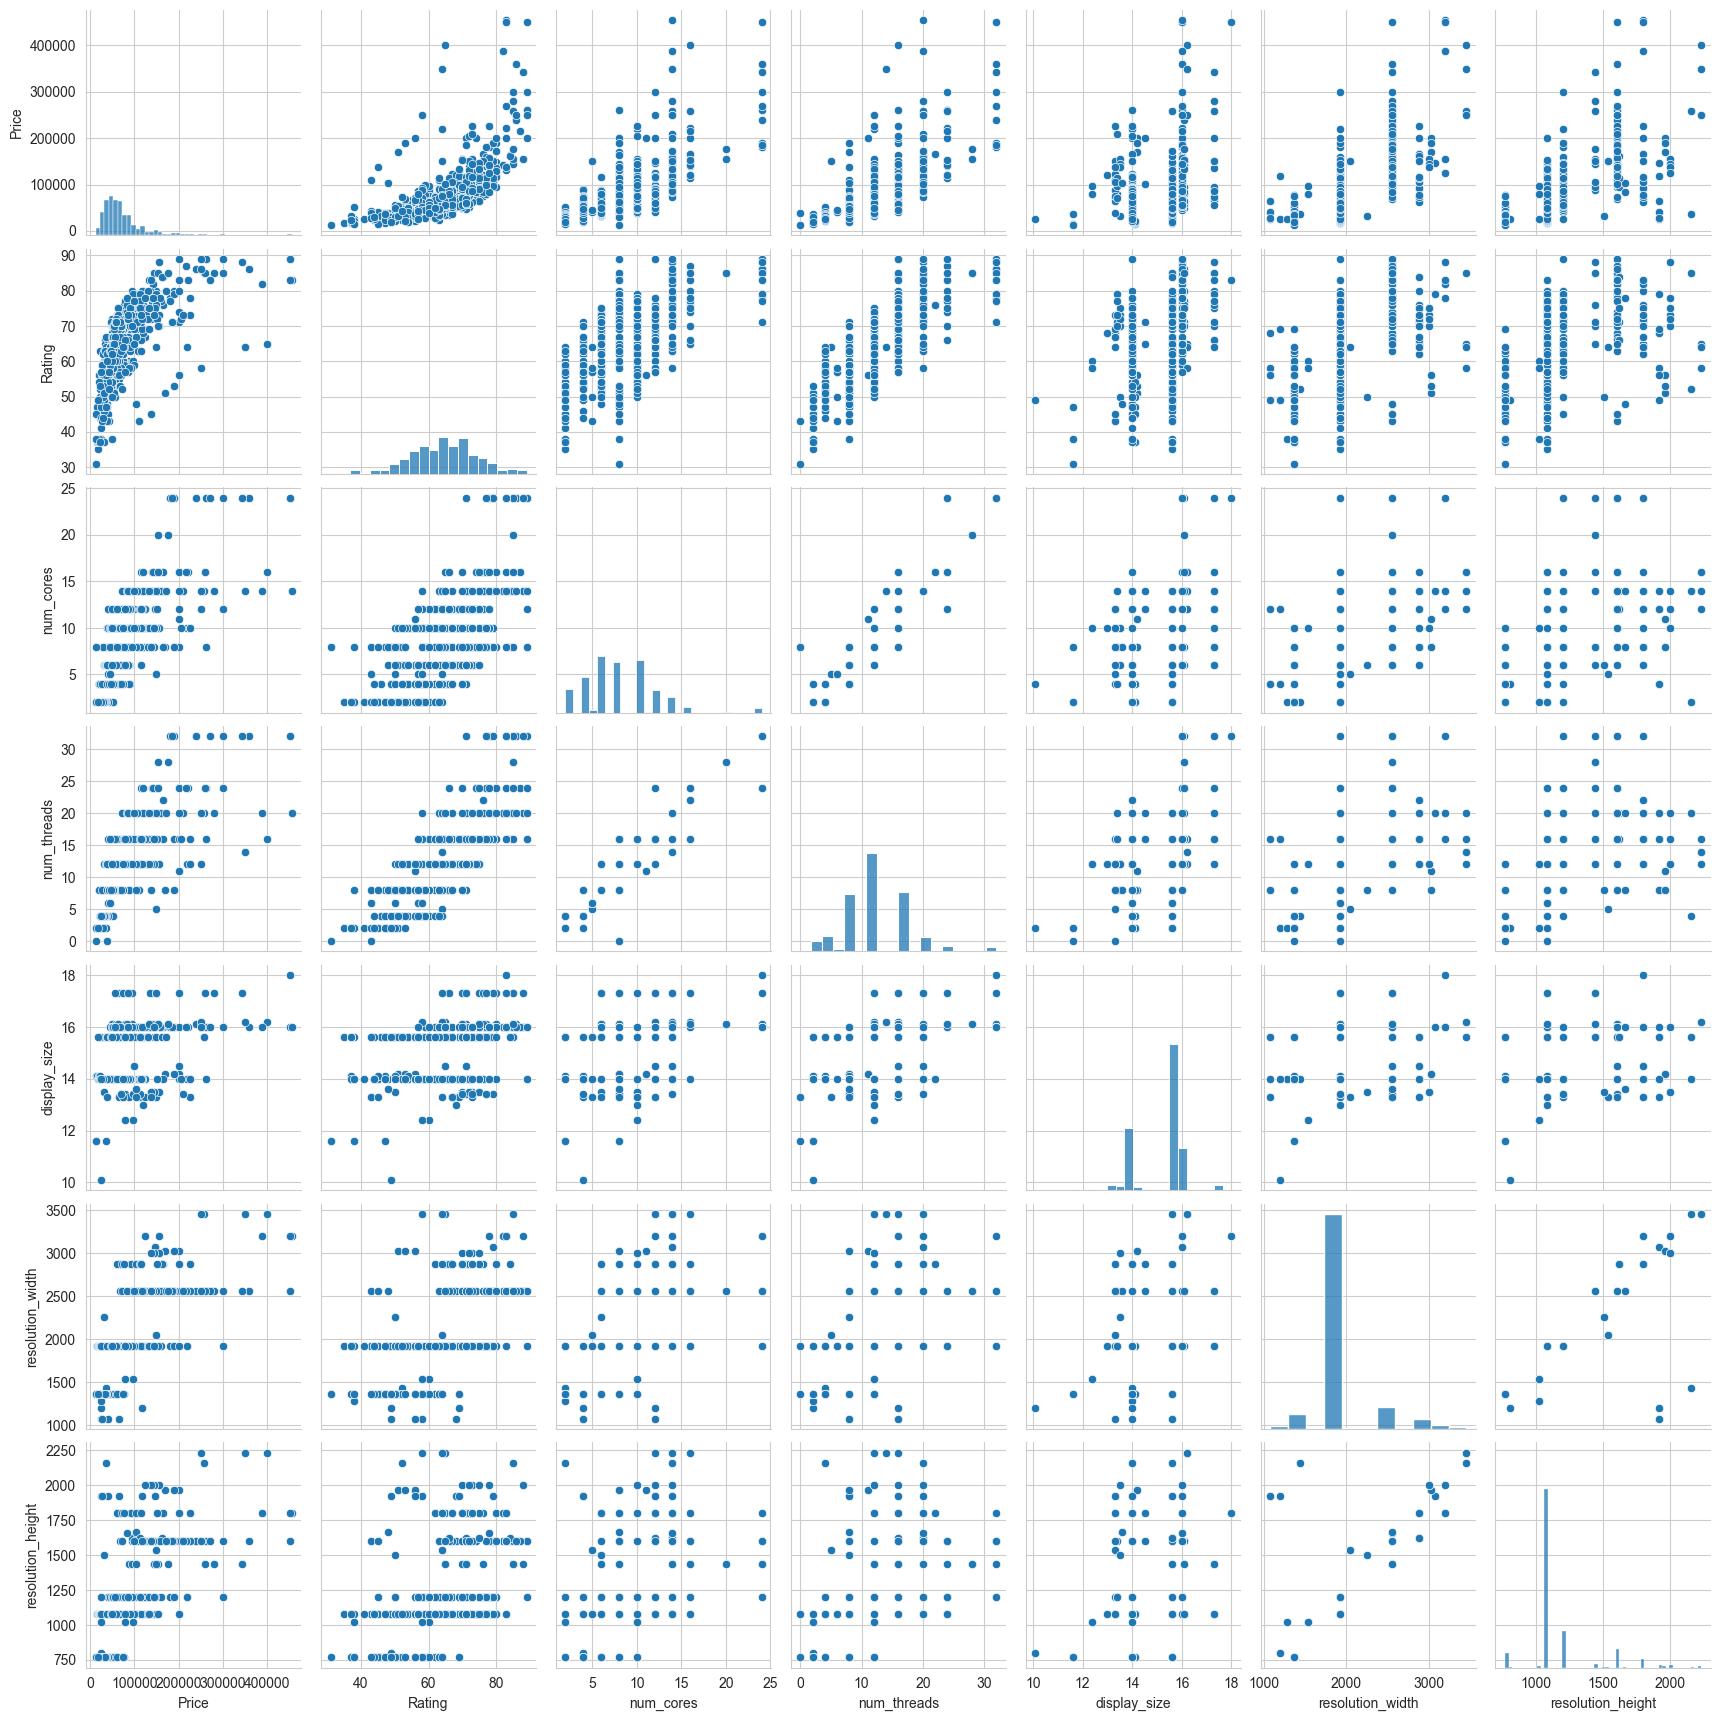

In [15]:
#create pairplot for these columns
sns.pairplot(df[column_names])
plt.show()

<Axes: xlabel='resolution_width', ylabel='resolution_height'>

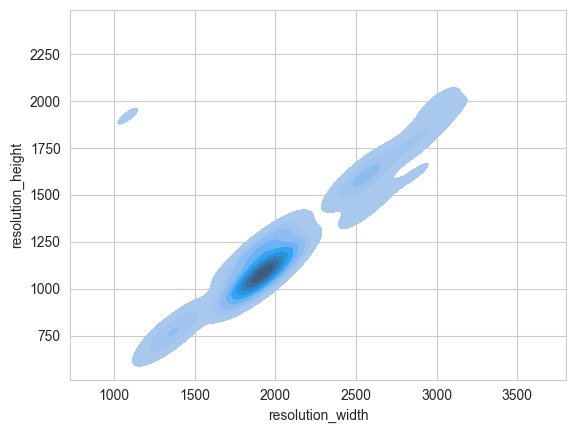

In [16]:
sns.kdeplot(data=df[['resolution_width','resolution_height']],x='resolution_width',y='resolution_height',fill=True)

/var/folders/7q/jtsqqb2j4bj4j9t6p9c76vw00000gn/T/ipykernel_8341/2466084181.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


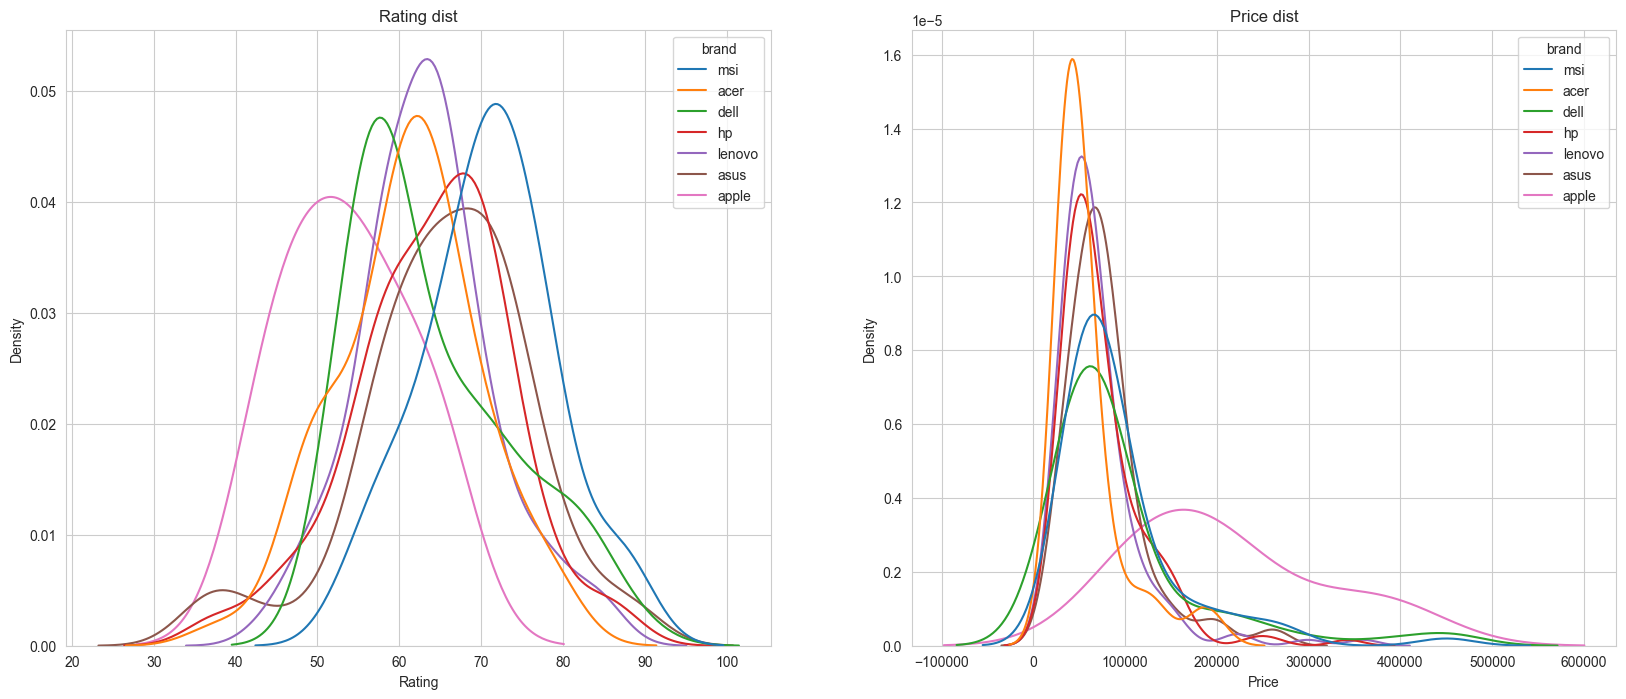

In [17]:
figure,ax = plt.subplots(1,2,figsize = (20,8))
ax = ax.flatten()
sns.kdeplot(data=df.loc[df.brand.isin(['hp','lenovo','asus','dell','msi','acer','apple'])],x='Rating',hue='brand',ax=ax[0],common_norm=False)
ax[0].set_title("Rating dist")
sns.kdeplot(data=df.loc[df.brand.isin(['hp','lenovo','asus','dell','msi','acer','apple'])],x='Price',hue='brand',ax=ax[1],common_norm=False)
ax[1].set_title("Price dist")
figure.show()

In [18]:
# I am trying to split model column into many columns

def extract_info_from_Model_column(df):
    # take first word of the model column
    df2=df.copy()
    df2['brand_from_model']=df2['Model'].str.split(' ').str[0]
    # take rest until '('
    df2['model_rest']=df2['Model'].str.split('(').str[0]
    # remove first word in model_rest and to string
    df2['model_rest']=df2['model_rest'].str.split(' ').str[1:].str.join(' ')
    # first word in model_rest is exact_model
    df2['exact_model']=df2['model_rest'].str.split(' ').str[0]
    # in ( ) take every fragment that ends with / or )
    df2['processor_exact_info']=df2['Model'].str.extract(r'\(([^/)]*)')
    # take next word after /
    df2['ram_exact_info']=df2['Model'].str.split('/').str[1].str.split(' ').str[1]
    # take next fragment after / until /
    df2['disk_exact_info']=df2['Model'].str.split('/').str[2]
    # take next fragment after / until / or )
    df2['os_exact_info']=df2['Model'].str.split('/').str[3].str.split(')').str[0]
    # if there is something after / and before take it
    df2['other_info']=df2['Model'].str.split('/').str[4].str.split(')').str[0]
    
    
    return df2

df2=extract_info_from_Model_column(df)
df2

,brand,Model,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,primary_storage_type,...,OS,year_of_warranty,brand_from_model,model_rest,exact_model,processor_exact_info,ram_exact_info,disk_exact_info,os_exact_info,other_info
0,msi,MSI Modern 15 B7M-072IN Laptop (Ryzen 5 7530U/...,43990,53,amd,ryzen 5,6,12,8,SSD,...,windows,1,MSI,Modern 15 B7M-072IN Laptop,Modern,Ryzen 5 7530U,8GB,512GB SSD,Win11,NaN
1,msi,MSI Prestige 16 A13UCX-250IN Laptop (13th Gen ...,119990,73,intel,core i7,14,20,16,SSD,...,windows,2,MSI,Prestige 16 A13UCX-250IN Laptop,Prestige,13th Gen Core i7,16GB,1TB SSD,Win11,4GB Graphic
2,acer,Acer Aspire 7 A715-75G Gaming Laptop (10th Gen...,45990,59,intel,core i5,4,8,8,SSD,...,windows,1,Acer,Aspire 7 A715-75G Gaming Laptop,Aspire,10th Gen Core i5,8GB,512GB SSD,Win11 Home,4GB Graph
3,msi,MSI CreatorPro Z16 HX B13VKTO-214IN Laptop (13...,449990,89,intel,core i9,24,32,4,SSD,...,windows,2,MSI,CreatorPro Z16 HX B13VKTO-214IN Laptop,CreatorPro,13th Gen Core i9,64GB,2TB SSD,Win11,RTX 3000 Ada
4,acer,Acer Aspire 3 Spin 14 NX.KENSI.002 Laptop (Int...,41490,45,intel,core i3,8,8,8,SSD,...,windows,1,Acer,Aspire 3 Spin 14 NX.KENSI.002 Laptop,Aspire,Intel Core i3 N305,8GB,512GB SSD,Win11 Home,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,acer,Acer Aspire Lite AL15 Laptop (AMD Ryzen 5 5500...,37990,60,amd,ryzen 5,6,12,16,SSD,...,windows,1,Acer,Aspire Lite AL15 Laptop,Aspire,AMD Ryzen 5 5500U,16GB,512GB SSD,Win11,NaN
689,hp,HP Victus 15-fb0050AX Gaming Laptop (AMD Ryzen...,59871,71,amd,ryzen 5,6,12,8,SSD,...,windows,1,HP,Victus 15-fb0050AX Gaming Laptop,Victus,AMD Ryzen 5 5600H,8GB,512GB SSD,Win11,4GB Graph
690,dell,Dell Vostro 15 3510 2023 Laptop (11th Gen Core...,47990,63,intel,core i5,4,8,8,SSD,...,windows,1,Dell,Vostro 15 3510 2023 Laptop,Vostro,11th Gen Core i5,8GB,512GB SSD,Win11 Home,NaN
691,hp,HP 240 G9 821J4PA Laptop (12th Gen Core i5/ 8G...,74999,64,intel,core i5,10,12,8,SSD,...,windows,1,HP,240 G9 821J4PA Laptop,240,12th Gen Core i5,8GB,512 GB SSD,Win11,NaN


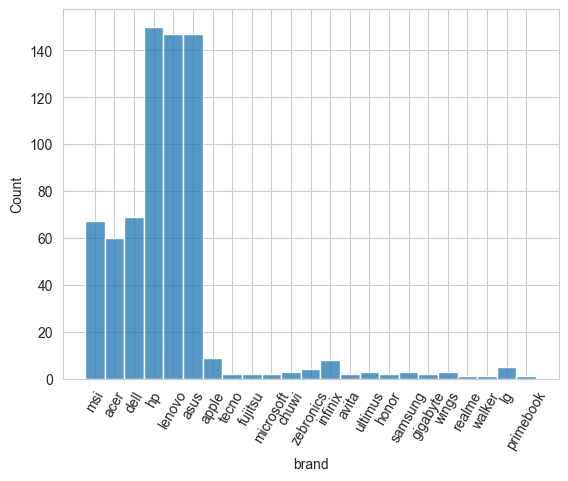

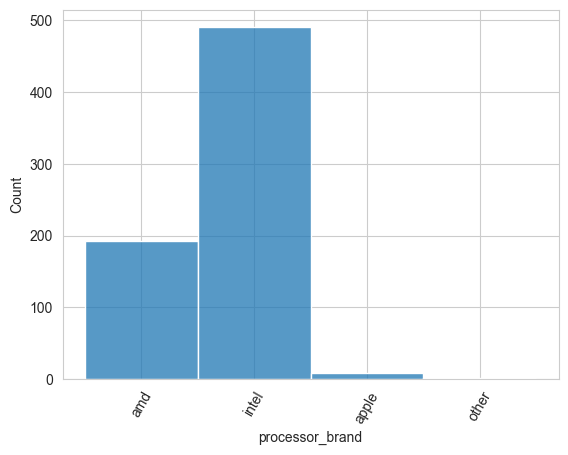

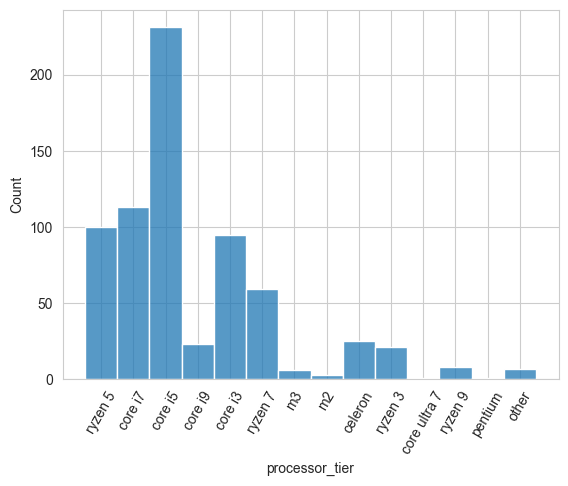

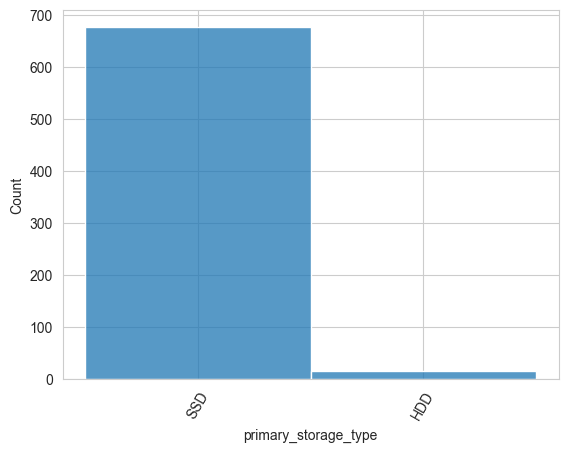

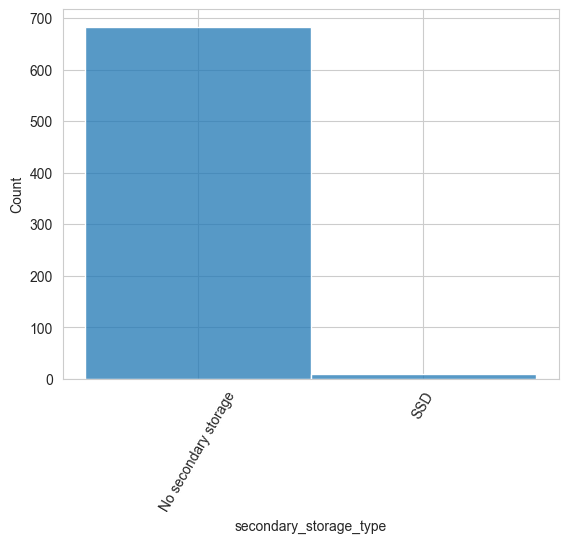

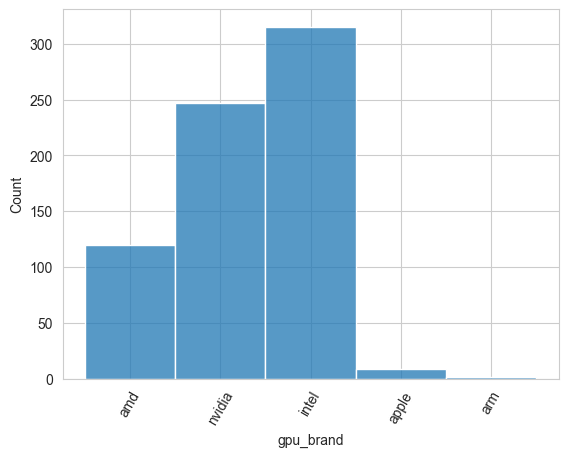

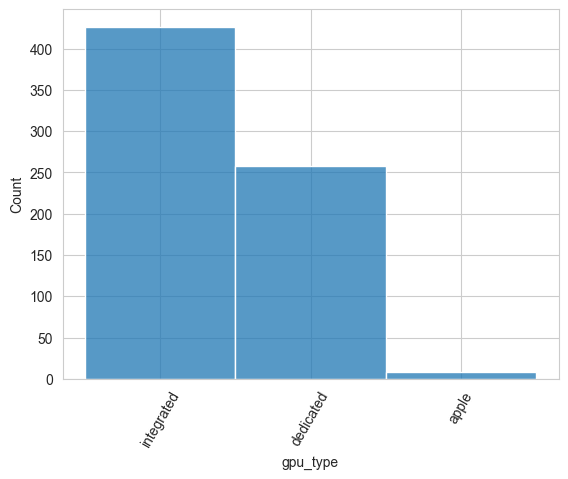

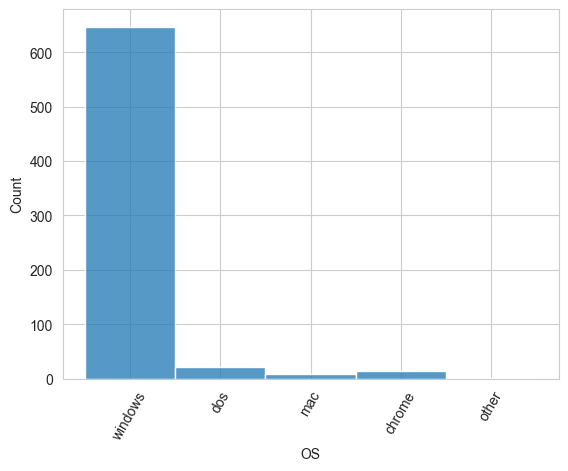

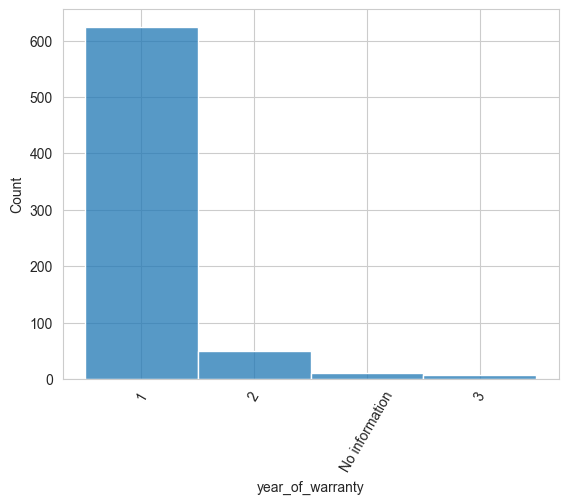

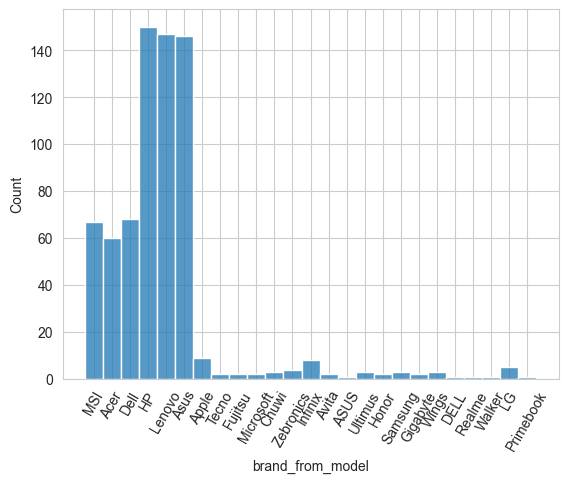

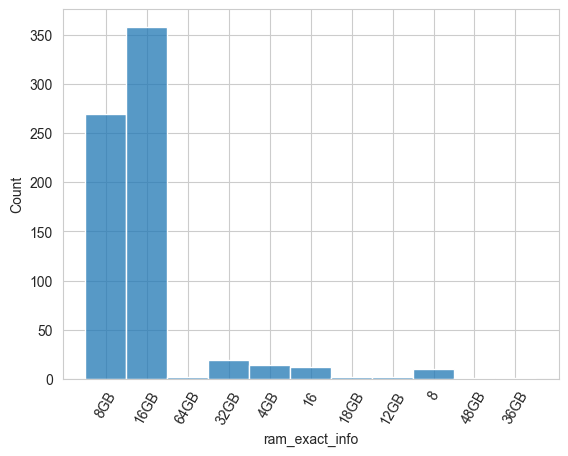

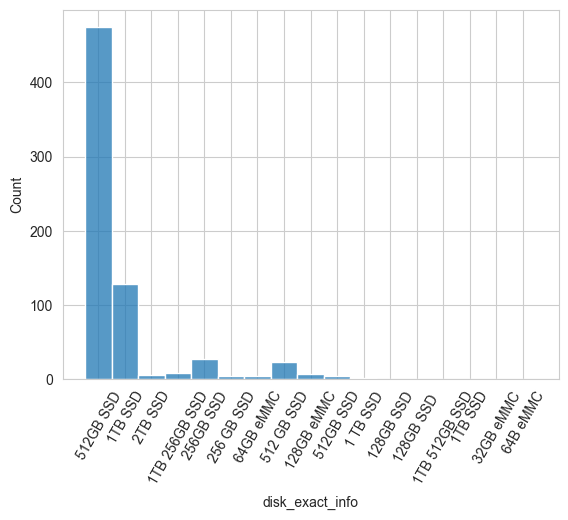

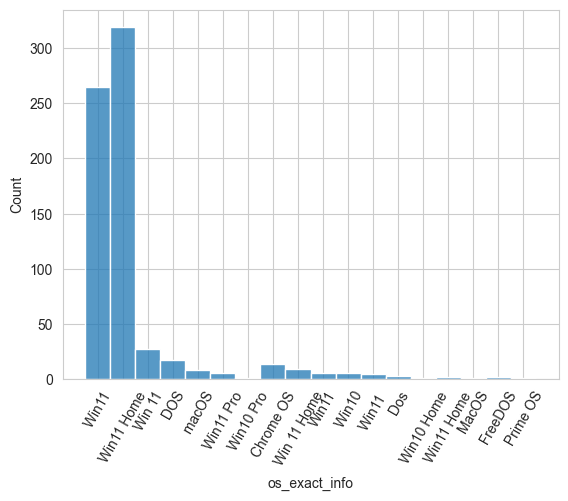

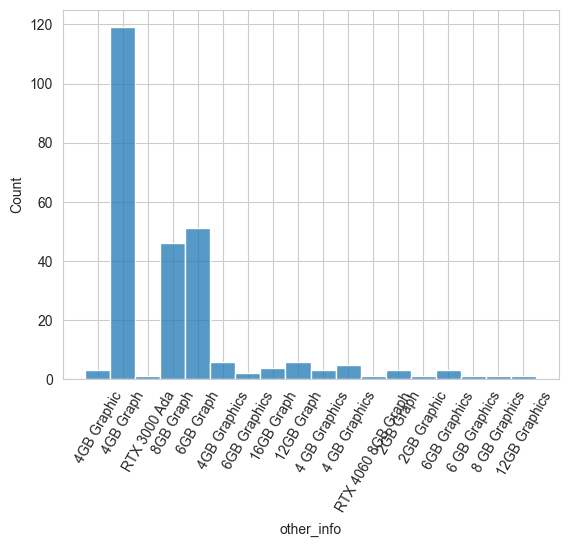

In [19]:
# plot histogram for every not numeric column with less that 25 unique values
for column in df2.select_dtypes(include=['object']).columns:
    if df2[column].nunique()<=32:
        sns.histplot(df2[column])
        plt.xticks(rotation=60)
        plt.show()

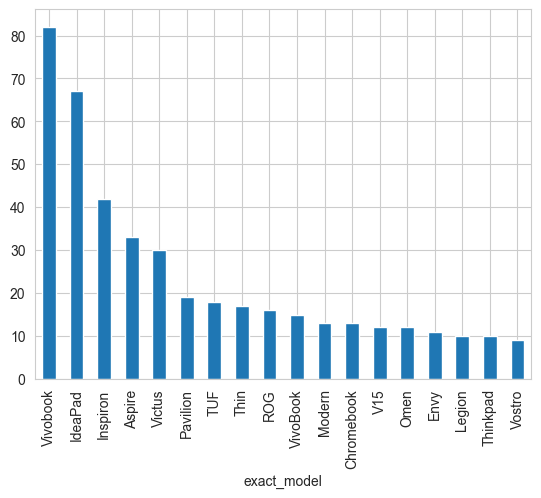

In [20]:
# plot histogram for top 18 most frequent models in exact_model
df2['exact_model'].value_counts().head(18).plot(kind='bar')
plt.show()

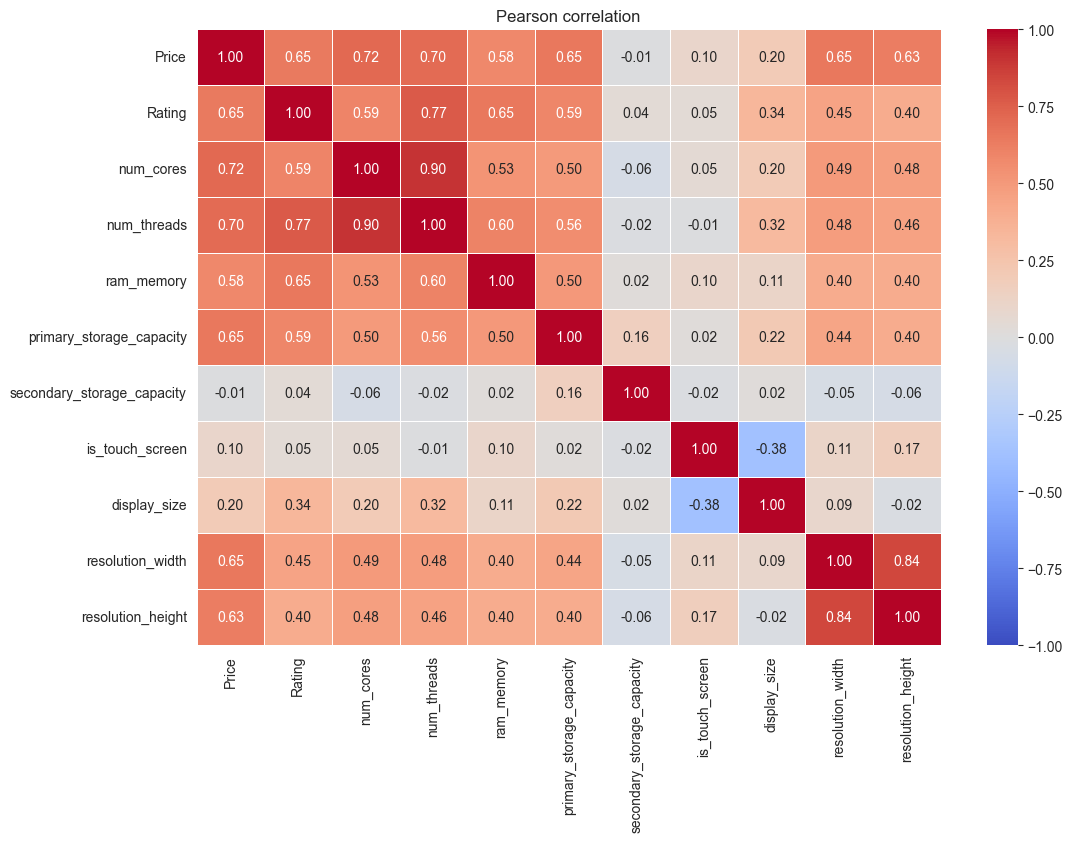

In [21]:
# create correlation matrix for numerical columns
corr_matrix=df2[numerical_columns].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True,cmap='coolwarm',fmt='.2f', linewidths=0.5,vmin=-1,vmax=1)
plt.title('Pearson correlation')
plt.show()

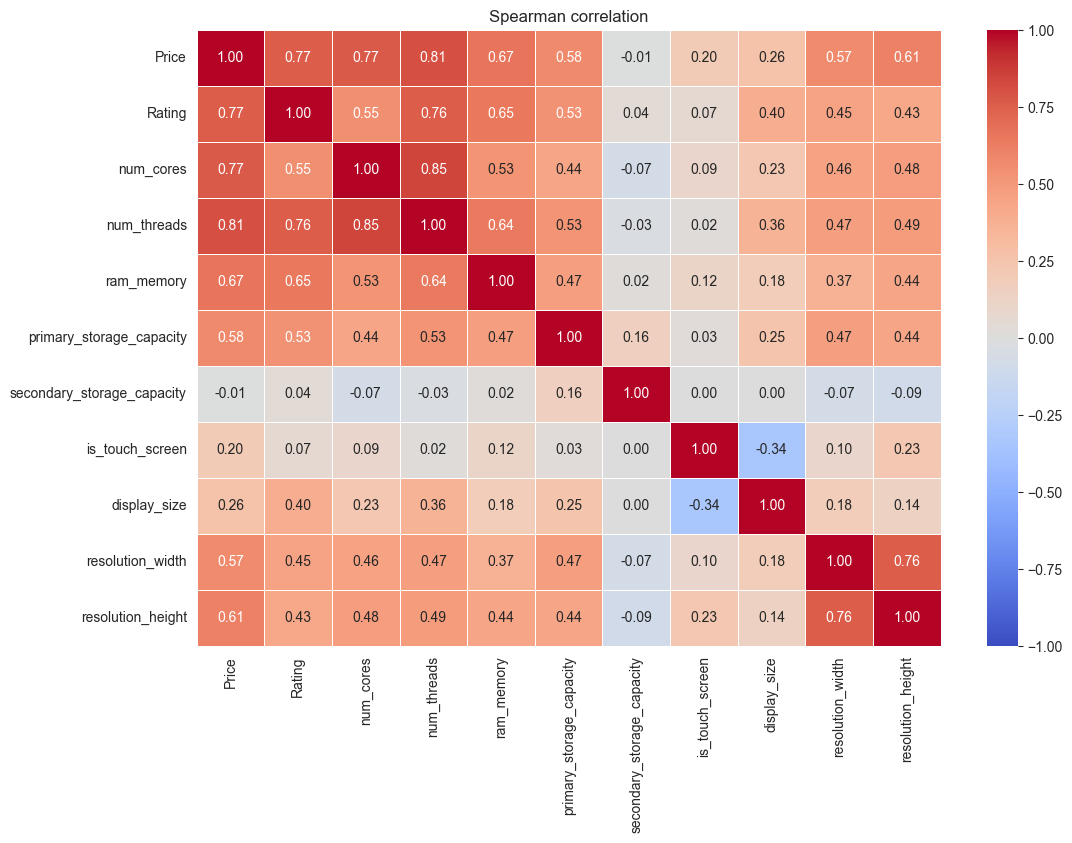

In [22]:
#different time of correlation
corr_matrix=df2[numerical_columns].corr(method='spearman')
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True,cmap='coolwarm',fmt='.2f', linewidths=0.5,vmin=-1,vmax=1)
plt.title('Spearman correlation')
plt.show()

## In this dataset currency used is Indian Rupees. We may want to convert it to USD in future.
I checked it.

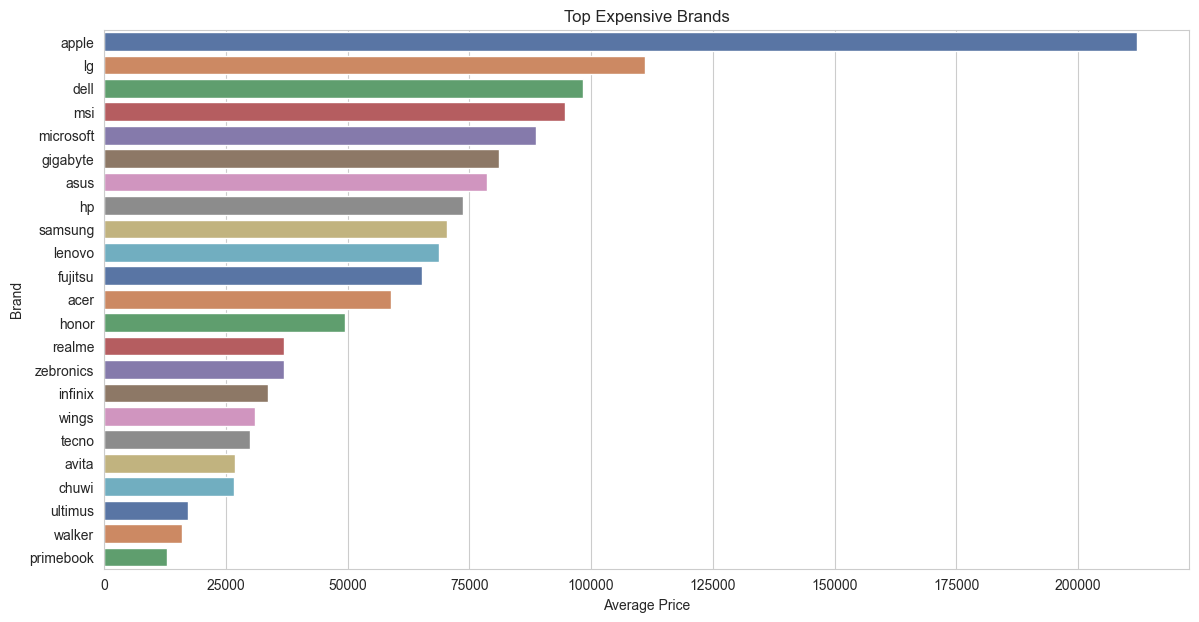

In [23]:
# top expensive brands
expensive_brands=df2.groupby('brand')['Price'].mean().sort_values(ascending=False)
expensive_brands

plt.figure(figsize=(14,7))
sns.barplot(y=expensive_brands.index, x=expensive_brands.values, palette='deep')
plt.ylabel('Brand')
plt.xlabel('Average Price')
plt.title('Top Expensive Brands')
plt.show()

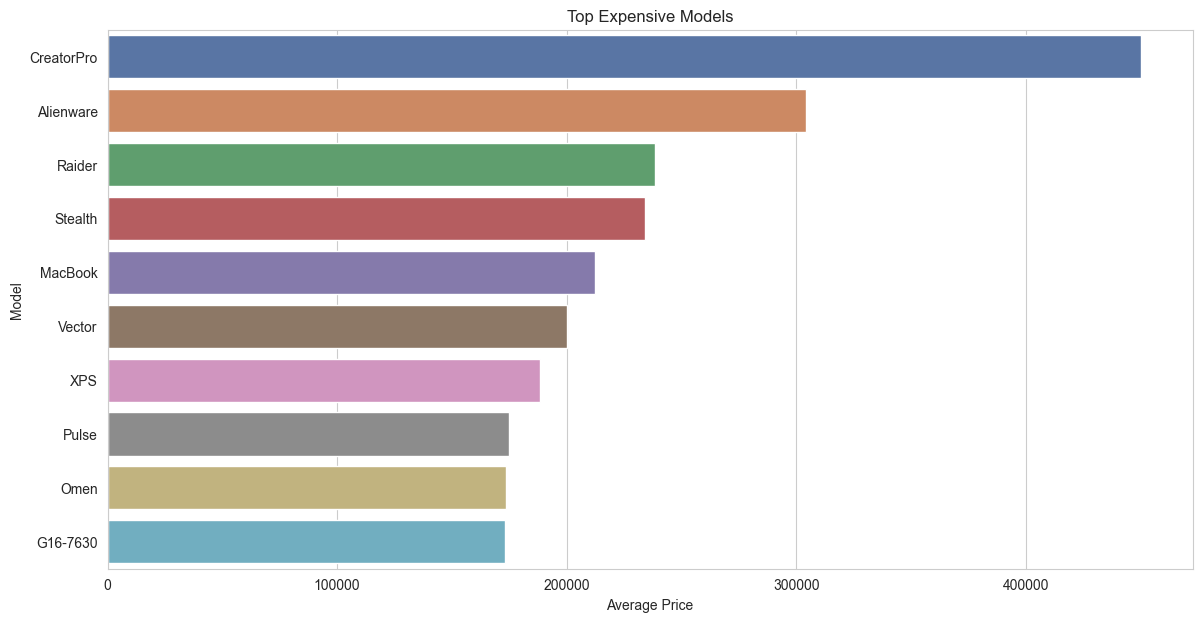

In [24]:
# top 10 expensive models
expensive_models=df2.groupby('exact_model')['Price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(14,7))
sns.barplot(y=expensive_models.index, x=expensive_models.values, palette='deep')
plt.ylabel('Model')
plt.xlabel('Average Price')
plt.title('Top Expensive Models')
plt.show()

# MSI CreatorPro Laptop
![](https://asset.msi.com/resize/image/global/product/product_168973370038c76adc3c6f51dfbab89066cd99b012.png62405b38c58fe0f07fcef2367d8a9ba1/1024.png)
# Dell Alienware Laptop
![](https://prod-api.mediaexpert.pl/api/images/gallery_500_500/thumbnails/images/53/5314036/Laptop-DELL-Alienware-x16-01.jpg)

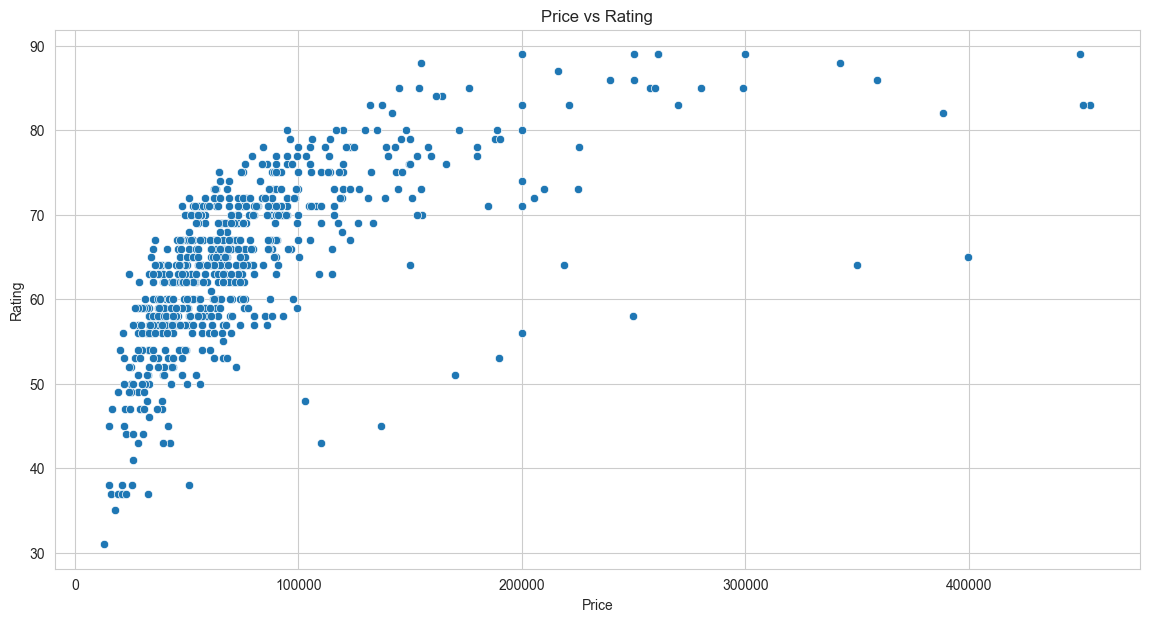

In [25]:
#scatter plot for price and rating
plt.figure(figsize=(14,7))
sns.scatterplot(x='Price', y='Rating', data=df2)
plt.title('Price vs Rating')
plt.show()

In [26]:
data_copy = df.copy()
diff1 = pd.get_dummies(data_copy[['processor_brand']],dtype='int')
diff2 = pd.get_dummies(data_copy[['OS']],dtype='int')
diff3 = pd.get_dummies(data_copy[['primary_storage_type','secondary_storage_type','gpu_brand','gpu_type']],dtype='int')
brands_to_keep = ['hp' , 'lenovo' , 'asus','dell','msi','acer','apple']
data_copy['brand'] = data_copy['brand'].apply(lambda x: x if x in brands_to_keep else 'other')
diff4 = pd.get_dummies(data_copy[['brand']],dtype='int')
data_copy_2 = data_copy.copy()
data_copy_2 = data_copy_2.drop(['Model','brand','OS','primary_storage_type','processor_brand','secondary_storage_type','processor_tier','gpu_brand','gpu_type','year_of_warranty'],axis=1)
df1 = pd.concat([data_copy_2,diff1,diff2,diff3,diff4],axis=1)
df1.is_touch_screen = df1.is_touch_screen + 0


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 693 samples in 0.001s...
[t-SNE] Computed neighbors for 693 samples in 0.174s...
[t-SNE] Computed conditional probabilities for sample 693 / 693
[t-SNE] Mean sigma: 1401.094328
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.951679
[t-SNE] KL divergence after 1000 iterations: 0.164433


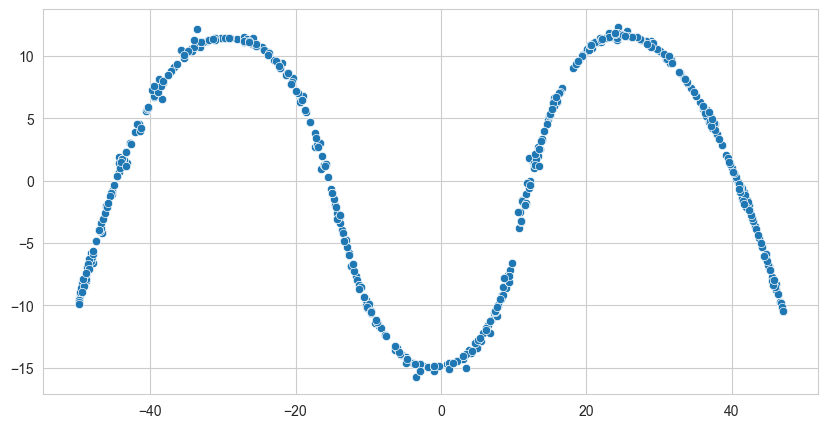

In [27]:
tSNE = TSNE(random_state=60, verbose=1,n_iter=1000)
digits_proj = tSNE.fit_transform(df1)
# for i in brands_to_keep:
#     df = digits_proj[data_copy.brand==i]
#     plt.figure(figsize=(10,5))
#     sns.scatterplot(x=df[:,0], y=df[:,1])
#     plt.show()
plt.figure(figsize=(10,5))
sns.scatterplot(x=digits_proj[:,0], y=digits_proj[:,1])
plt.show()